## Sales prediction of a Product After Investing million dollars on different channels
Dataset : Advertising.csv

Dataset Description
The Advertising.csv dataset typically contains the following columns:

TV: Advertising budget spent on TV (in thousands of dollars).
Radio: Advertising budget spent on radio.
Newspaper: Advertising budget spent on newspapers.
Sales: The target variable (sales in thousands of units).



# Load and explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
Record = pd.read_csv('Advertising.csv')

data = pd.DataFrame(Record)

#Display the first few rows
print(data.head())

#Check for missing values
print(data.isnull().sum())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


## Preprocess the data

In [2]:
X = data[['TV','newspaper','radio']]
y = data['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [3]:
##Fit and the prediction by model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
#Prediction by model on test set
y_pred = model.predict(X_test)


#Evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_pred,y_test)

print(f"The mse of this Model is  {mse}")


The mse of this Model is  3.1740973539761046


## Implementing cost function or mse  from Scratch but on real world datset(wihut scikit learn)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Custom MSE function
def compute_cost(X_test, y_test):
    m = len(y_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors = y_pred - y_test
    squared_errors = errors ** 2
    cost = (1 / m) * np.sum(squared_errors)
    return cost

# Compare custom MSE with library
cost = compute_cost(X_test, y_test)
print(f"Custom MSE: {cost}")

from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(f"Sklearn MSE: {mean_squared_error(y_test, y_pred)}")


Custom MSE: 3.174097353976105
Sklearn MSE: 3.1740973539761046


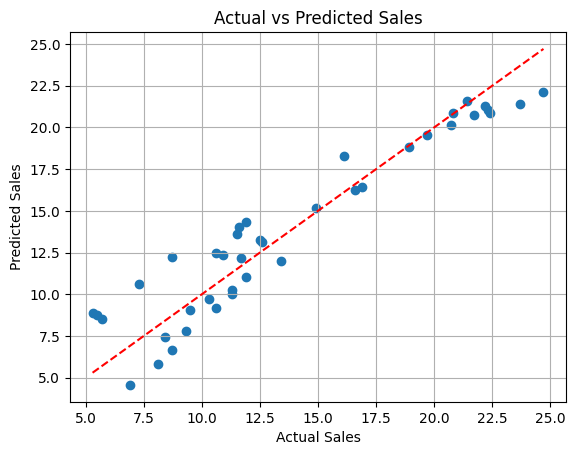

In [8]:
#Plot
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()


## Implemenation of Gradient descent on the dataset

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example: Assume X_train and y_train are your training data
# X_train: shape (m, n)
# y_train: shape (m, )

# 1. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 2. Add Bias Term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # shape: (m, n+1)
y = y_train.reshape(-1, 1)  # make y a column vector

# Gradient Descent Implementation
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradients

        # Track cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Optional: stop if cost change is very small
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-8:
            break

    return theta, cost_history

# Initialize theta
theta = np.zeros((X_b.shape[1], 1))

# Hyperparameters
learning_rate = 0.01  # Start small
iterations = 1000

# Run Gradient Descent
theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print("Final parameters (theta):", theta_final.flatten())
print("Final cost:", cost_history[-1])


Final parameters (theta): [14.09939129  0.          3.76427152  2.78967018  0.05861692]
Final cost: 1.3525691541904687


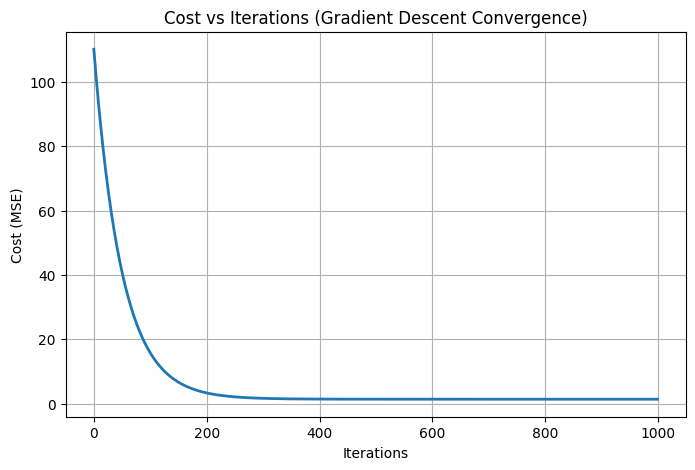

In [17]:
# ✅ Plot Cost vs Iterations
plt.figure(figsize=(8,5))
plt.plot(range(len(cost_history)), cost_history, linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations (Gradient Descent Convergence)')
plt.grid(True)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

# Train using Scikit-Learn
model = LinearRegression()
model.fit(X_train, y_train)

# Compare coefficients
print("Scikit-Learn Coefficients:", model.intercept_, model.coef_)
print("Your GD Coefficients:", theta_final.flatten())

Scikit-Learn Coefficients: [2.97906734] [[0.         0.04472952 0.18919505 0.00276111]]
Your GD Coefficients: [14.09939129  0.          3.76427152  2.78967018  0.05861692]
